In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### EX- 1 Download the MPG data file from UCI Machine Learning repository https://archive.ics.uci.edu/ml/machine-learningdatabases/auto-mpg/


In [2]:
df =pd.read_csv("auto-mpg.data", delim_whitespace=True, names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car_name'])

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
#Checking the Datatypes and Total no. of entries and nulll values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df.horsepower.unique() # I can see that horsepower is type "Object", Now converting to float and checking the unique values.

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [6]:
df = df[df.horsepower != '?']

In [14]:
df["horsepower"]=df[['horsepower']].apply(pd.to_numeric)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car_name        392 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [9]:
# Checking the highly corelated values with mpg for univibrate analysis.
# weight, displacement,horsepower,cylinders are highly corelated means if thease all values increase then mpg will decrease vise versa.
# we can take any one of them for analysis but i will got with horsepower
Corelation = df.corr() 
Corelation

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


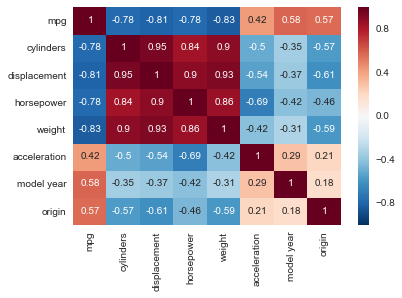

In [10]:
# Looks like all features are highly corellated to Target (MPG) variables.We can take all variables for model creation.
sns.heatmap(Corelation,annot=True)

### 2 - Identify target variable and independent variable.

In [28]:
# Target Varivales
target = df["mpg"].values

In [29]:
# Features / Independent Variables 
independent_variables = df['horsepower'].values

In [30]:
target.dtype,independent_variables.dtype,target.shape,independent_variables.shape

(dtype('float64'), dtype('float64'), (392,), (392,))

In [32]:
target = target.reshape(-1,1)
target.shape

(392, 1)

In [37]:
independent_variables.reshape(-1,1)
independent_variables.shape

(392,)

## 3 - Data Preparation

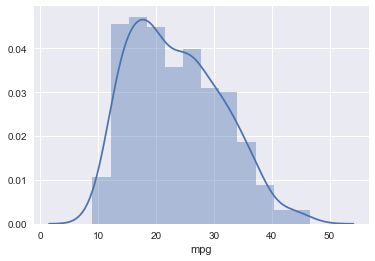

In [38]:
# Now checking the Target Variables.
from scipy import stats

sns.distplot(df["mpg"])

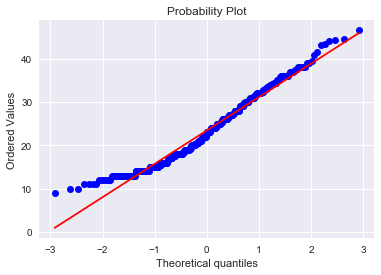

In [39]:
# Probability Plot -Data distribution should closely follow the diagonal that represents the normal distribution.
res = stats.probplot(df['mpg'], plot=plt)

In [40]:
df["horsepower"]=df["horsepower"].apply(np.log)

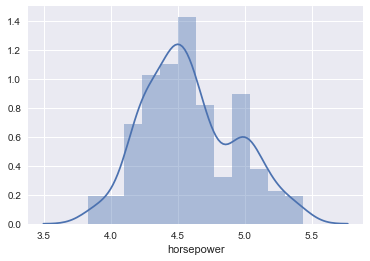

In [41]:
sns.distplot(df["horsepower"])

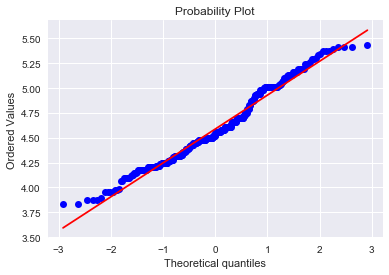

In [42]:
# After aplying log transformation on horsepower the all points follow the straight line.
res = stats.probplot(df['horsepower'], plot=plt)

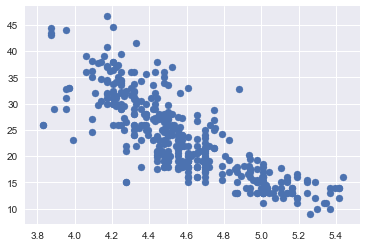

In [43]:
plt.scatter(data=df,x="horsepower",y="mpg") # Yes we can see both have a good relationship 

In [44]:
# Target Varivales
target = df["mpg"].values

# Features / Independent Variables 
independent_variables = df['horsepower'].values

## Univariate Regression

### Ex 2. Import relevant python libraries and sklearn linear_model

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score

### Ex 3. Split the file into train [80%] and test [20%] data

In [47]:
x_train,x_test,y_train,y_test = train_test_split(independent_variables,target,test_size= 0.2,random_state = 0)

In [48]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((313,), (313,), (79,), (79,))

### Ex 4. Apply linear regression

In [49]:
lr = LinearRegression()

### Ex 5. Train the model using the training sets

In [51]:
lr.fit(x_train.reshape(-1, 1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###  Ex 6. Display the coefficients coef, intercept and residues

In [52]:
lr.coef_

array([-18.55220273])

In [53]:
lr.intercept_

108.54285712073064

In [54]:
lr.residues_

C:\Users\Pawan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


6507.2631358901053

### Ex 7.Predict using test data

In [56]:
y_Predict = lr.predict(x_test.reshape(-1, 1))

### Ex 8. Perform Accuracy check using the R Square

In [57]:
# First we are checking the model accurecy using test data.
lr.score(x_test.reshape(-1, 1),y_test)

0.7163381320103579

In [58]:
#Checking the model accurecy using train data
lr.score(x_train.reshape(-1, 1),y_train)

0.65582152410407046

In [61]:
r2_score(y_test, y_Predict)

0.7163381320103579

### Ex 9. Display using scatter plot the data points and the best fit line

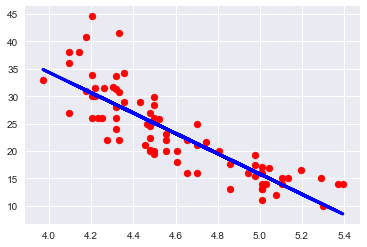

In [73]:
plt.scatter(x_test, y_test, color='red')
#plt.scatter(x_train, y_train, color='green')
plt.plot(x_test, y_Predict, color='blue', linewidth=3)